# Note about Data: 
stored on Meas PC in Lab (not loading data on github b/c too large in memory)


In [1]:
import sys 
sys.path.append(r'C:\Users\Chakram_Meas\Documents\GitHub\Multimode-Conditional-Displacements\hpc_runs\single_mode_ecd\class_description')
sys.path.append(r'C:\Users\Chakram_Meas\Documents\GitHub')

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
from qutip import *
from ECD_batch_optimizerV1 import BatchOptimizer
from Simulation_Classes_Single_ModeV5 import *
import matplotlib.pyplot as plt
#import tfq_quantum as tfq
import tensorflow as tf

In [12]:
#Modes Truncation
N = 15

### Batch Optimizer

In [13]:
#get the params 
import pandas as pd
param_df = pd.read_csv(r'C:\Users\Chakram_Meas\Documents\GitHub\Multimode-Conditional-Displacements\hpc_runs\single_mode_ecd\State Transfer\fock_prep')

In [14]:
param_df

,task,layer,pulse_time,BO_fid,filenum
0,1,2,640,0.367880,0
1,1,3,972,0.735761,1
2,1,4,1216,0.981402,2
3,1,5,1388,0.998436,3
4,1,6,1876,0.999243,4
5,2,2,760,0.270671,5
6,2,3,1184,0.541341,6
7,2,4,1408,0.928658,7
8,2,5,1648,0.974011,8
9,2,6,1776,0.998754,9


# Check for g0-> g1

In [55]:
N1 = N
#Initial oscillator state.
Fock1 = 0
psi_i1 = basis(N1,Fock1) #initial state
initial = tensor(basis(2,0), psi_i1)

#Target
Fock1 = 1
psi_t1 = basis(N1,Fock1) #target state
target = tensor(basis(2,0), psi_t1)

In [56]:
T1_cavity = 436*1e+3 #mu s
Techo_cavity = 1*T1_cavity #???
T_phi_cavity = 150 *1e+6
T1_qubit = 50*1e+3 #mu s
Techo_qubit = 65 *1e+3


In [57]:
from Simulation_Classes_Single_ModeV5 import *

In [58]:
#entry 4 in param df has the best fock1 fidelity
angles_prefix = r'C:\Users\Chakram_Meas\Documents\GitHub\Multimode-Conditional-Displacements\hpc_runs\single_mode_ecd\State Transfer\Data\angles_'
angles_filename = angles_prefix + str(param_df['filenum'][4]) + '.txt'
pulse_sim = ecd_pulse_single_mode(param_file = angles_filename, 
                                 kappa = 2*np.pi*(1/T1_cavity))

In [59]:
pulse_sim.get_pulses()

Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 1.6708480361474938
Modified conditional displacement called


C:\Users\Chakram_Meas\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


---------------------------
Final Displacement: 1.204773809360536
Modified conditional displacement called
---------------------------
Final Displacement: 0.5786960102577321
Modified conditional displacement called
---------------------------
Final Displacement: 0.7402268458888699
Modified conditional displacement called
---------------------------
Final Displacement: 1.2587598420193398
Modified conditional displacement called
---------------------------
Final Displacement: 0.027391527051222622


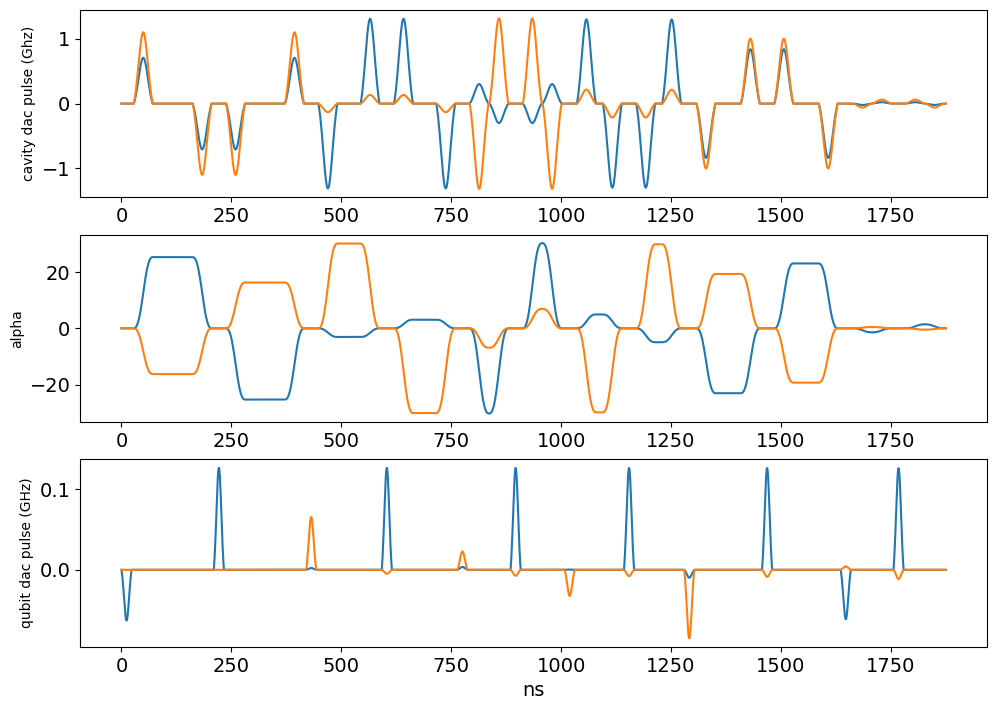

In [60]:
pulse_sim.plot_pulses()

In [61]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.me_solve(initial = initial)
ecd_fid = qutip_sim.get_fidelity(target)
print(ecd_fid)

(0.9985393999527317+0j)


In [62]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_qubit_relaxation(T1 = T1_qubit)
qutip_sim.me_solve(initial = initial)
tr_fid = qutip_sim.get_fidelity(target)
print(tr_fid)

0.947679493556051


In [63]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_qubit_dephasing(T1 = T1_qubit, Techo = Techo_qubit)
qutip_sim.me_solve(initial = initial)
tp_fid = qutip_sim.get_fidelity(target)
print(tp_fid)

0.9849137424720285


In [64]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_cavity_relaxation(T1_cavity)
qutip_sim.me_solve(initial = initial)
cr_fid = qutip_sim.get_fidelity(target)
print(cr_fid)

0.9859739266086546


In [65]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_cavity_dephasing(T1_cavity, Techo_cavity, thermal = False, T_phi = T_phi_cavity)
#qutip_sim.add_cavity_dephasing(T1_cavity, Techo_cavity, thermal = False, T_phi = None) 
qutip_sim.me_solve(initial = initial)
cp_fid = qutip_sim.get_fidelity(target)
print(cp_fid)

0.9184312571955299


C:\Users\Chakram_Meas\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
C:\Users\Chakram_Meas\AppData\Local\Temp\ipykernel_21320\3994681787.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(conditions, fontsize = 15)


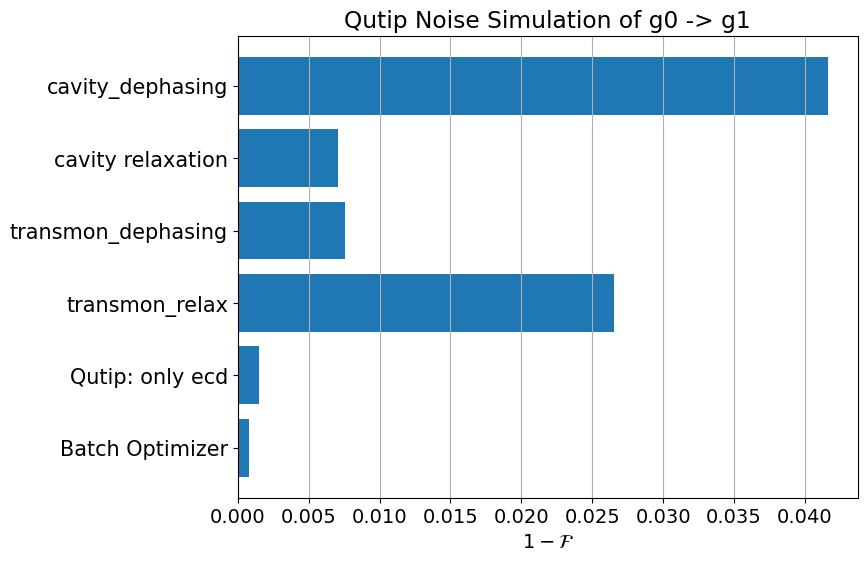

In [66]:
conditions = ['Batch Optimizer', 'Qutip: only ecd', 
               'transmon_relax','transmon_dephasing',
             'cavity relaxation', 'cavity_dephasing']
x_pos = np.arange(len(conditions))
bars = [param_df['BO_fid'][4], ecd_fid,
       np.sqrt(tr_fid), np.sqrt(tp_fid), np.sqrt(cr_fid), np.sqrt(cp_fid)]
bars_inv = [1- i for i in bars]

fig, ax = plt.subplots(figsize = (8,6))
ax.barh(conditions, bars_inv, align='center')
ax.set_xlabel('$1-\mathcal{F}$')
#ax.set_xticks(x_pos)
ax.set_yticklabels(conditions, fontsize = 15)
ax.set_title('Qutip Noise Simulation of g0 -> g1')
ax.xaxis.grid(True)
#plt.yticks(range(len(conditions)), conditions, rotation = 90)

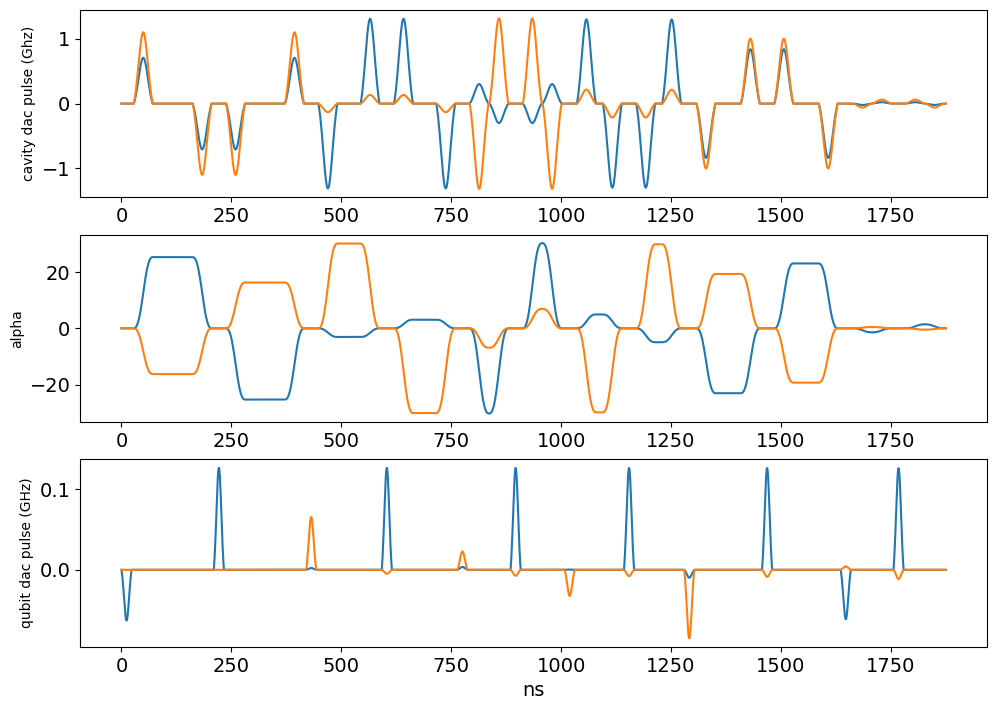

In [67]:
pulse_sim.plot_pulses()

# Fock 2

In [39]:
N1 = N
#Initial oscillator state.
Fock1 = 0
psi_i1 = basis(N1,Fock1) #initial state
initial = tensor(basis(2,0), psi_i1)

#Target
Fock1 = 2
psi_t1 = basis(N1,Fock1) #target state
target = tensor(basis(2,0), psi_t1)

In [40]:
angles_prefix = r'C:\Users\Chakram_Meas\Documents\GitHub\Multimode-Conditional-Displacements\hpc_runs\single_mode_ecd\State Transfer\Data\angles_'
angles_filename = angles_prefix + str(param_df['filenum'][10]) + '.txt'
pulse_sim = ecd_pulse_single_mode(param_file = angles_filename, 
                                 kappa = 2*np.pi*(1/T1_cavity))

Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 1.1964645234804085
Modified conditional displacement called


C:\Users\Chakram_Meas\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


---------------------------
Final Displacement: 1.1733855415689525
Modified conditional displacement called
---------------------------
Final Displacement: 0.7465796846911698
Modified conditional displacement called
---------------------------
Final Displacement: 1.3766647244193766
Modified conditional displacement called
---------------------------
Final Displacement: 0.6605303994599919
Modified conditional displacement called
---------------------------
Final Displacement: 0.414076073193706
Modified conditional displacement called
---------------------------
Final Displacement: 0.05779413440743729


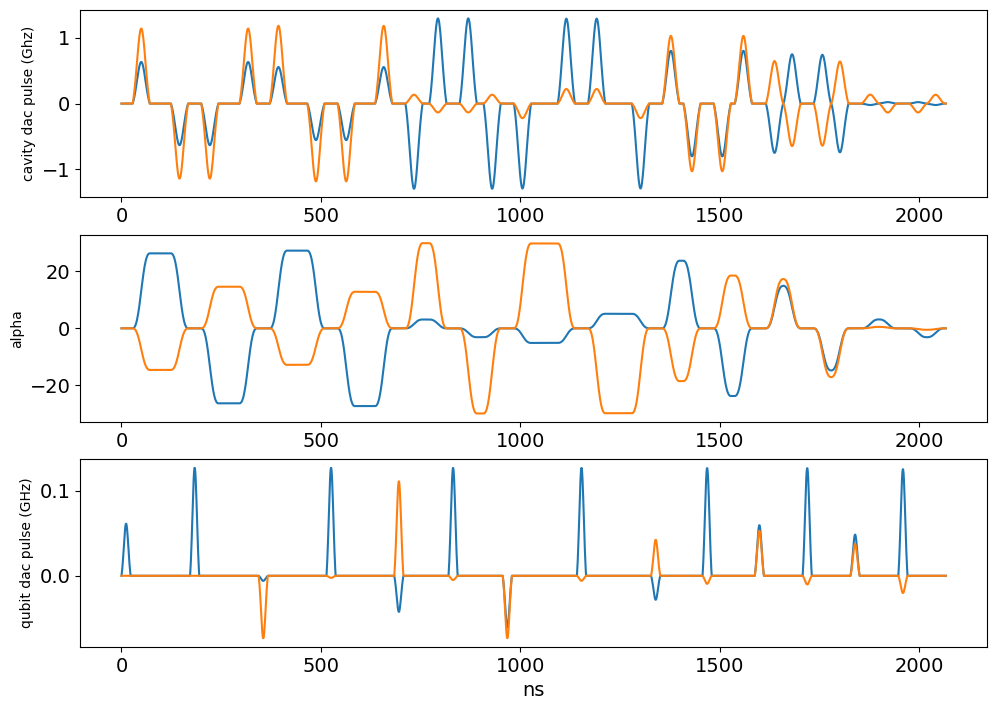

In [41]:
pulse_sim.get_pulses()
pulse_sim.plot_pulses()

In [42]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.me_solve(initial = initial)
ecd_fid = qutip_sim.get_fidelity(target)
print(ecd_fid)

(0.9924728624685639+0j)


In [43]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_qubit_relaxation(T1 = T1_qubit)
qutip_sim.me_solve(initial = initial)
tr_fid = qutip_sim.get_fidelity(target)
print(tr_fid)

0.9390310619820733


In [44]:
qutip_sim = qutip_sim_single_mode(n_q = 2, n_c = N,
                                   alpha = pulse_sim.alpha,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
qutip_sim.add_cavity_dephasing(T1_cavity, Techo_cavity, thermal = False, T_phi = T_phi_cavity)
#qutip_sim.add_cavity_dephasing(T1_cavity, Techo_cavity, thermal = False, T_phi = None) 
qutip_sim.me_solve(initial = initial)
cp_fid = qutip_sim.get_fidelity(target)
print(cp_fid)

0.910093746683724


C:\Users\Chakram_Meas\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
C:\Users\Chakram_Meas\AppData\Local\Temp\ipykernel_21320\4262990333.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(conditions, fontsize = 15)


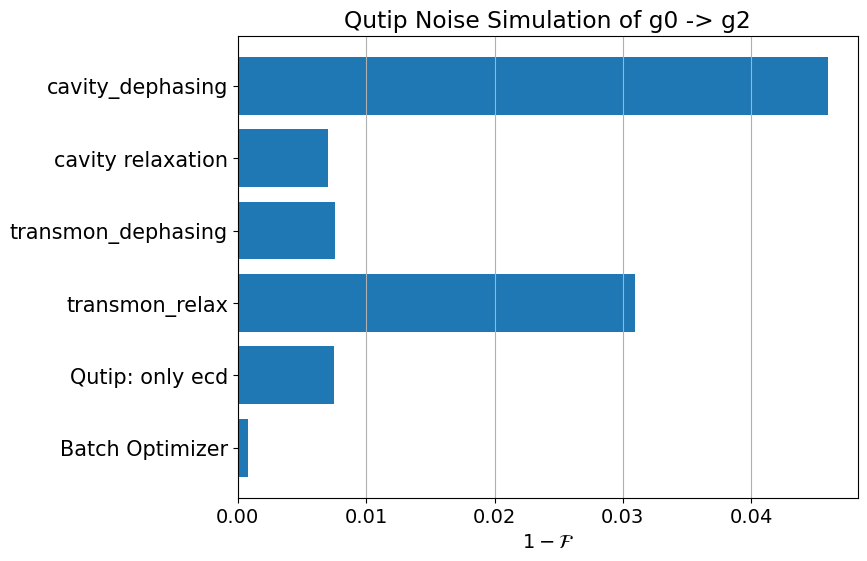

In [45]:
conditions = ['Batch Optimizer', 'Qutip: only ecd', 
               'transmon_relax','transmon_dephasing',
             'cavity relaxation', 'cavity_dephasing']
x_pos = np.arange(len(conditions))
bars = [param_df['BO_fid'][4], ecd_fid,
       np.sqrt(tr_fid), np.sqrt(tp_fid), np.sqrt(cr_fid), np.sqrt(cp_fid)]
bars_inv = [1- i for i in bars]

fig, ax = plt.subplots(figsize = (8,6))
ax.barh(conditions, bars_inv, align='center')
ax.set_xlabel('$1-\mathcal{F}$')
#ax.set_xticks(x_pos)
ax.set_yticklabels(conditions, fontsize = 15)
ax.set_title('Qutip Noise Simulation of g0 -> g2')
ax.xaxis.grid(True)
#plt.yticks(range(len(conditions)), conditions, rotation = 90)

### Get the Pulses

In [7]:
from Simulation_Classes_Two_ModeV4 import *

### Calculator (Not Needed)
Since Batch Optimizer agrees generally with calc

# Main
Vary conditions, see differences in fidelities

In [13]:
#Initial oscillator state.
Fock1 = 0
Fock2= 1
psi_i1 = basis(N1,Fock1) #initial state
psi_i2 = basis(N2,Fock2)
initial = tensor(basis(2,0), psi_i1, psi_i2)

#Target
Fock1 = 1
Fock2= 0
psi_t1 = basis(N1,Fock1) #target state
psi_t2 = basis(N2,Fock2)
target = tensor(basis(2,0), psi_t1, psi_t2)

In [14]:
errors = ['bare qubit mode coupling',
          'stark shift',
          'mode coupling',
          'transmon relax',
          'transmon dephasing',
          'cavities relax',
          'cavities dephasing'
          ]  

In [15]:
columns = ['exact fidelity','bo_fidelity','betas','gammas','phis','thetas',
                                                   'only ecd'] +errors
df = pd.DataFrame([[None for i in range(len(columns))]], columns=columns)

In [16]:
df

,exact fidelity,bo_fidelity,betas,gammas,phis,thetas,only ecd,bare qubit mode coupling,stark shift,mode coupling,transmon relax,transmon dephasing,cavities relax,cavities dephasing
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
fname = "Noise_sim_one_by_one__15_level_sep_15"
df.to_csv(fname, index=False)

In [ ]:
from IPython.display import clear_output
import ast

N_times = len(param_df['exact fidelity'])     # No. of optimized sets of parameters


from IPython.display import clear_output
    
for k in range(1, 21): 
    print(k)
    #First import parameters
    betas_r = ast.literal_eval(param_df['betas_r'][k])
    betas_i = ast.literal_eval(param_df['betas_i'][k])
    gammas_r = ast.literal_eval(param_df['gammas_r'][k])
    gammas_i = ast.literal_eval(param_df['gammas_i'][k])
    
    betas = np.asarray([complex(betas_r[l], betas_i[l]) for l in range(len(betas_r))] )
    gammas = np.asarray([complex(gammas_r[l], gammas_i[l]) for l in range(len(gammas_r))] )
    #print(betas)
    
    phis = np.asarray(ast.literal_eval(param_df['phis'][k]))
    thetas = np.asarray(ast.literal_eval(param_df['thetas'][k]))
    #print(phis)
    bo_fid = float(param_df['bo_fidelity'][k])
    ex_fid = float(param_df['exact fidelity'][k])
    
    #Then get pulses
    
    T1_mode1 = 2e+6 #2ms
    T1_mode2 = 2e+6 #2ms

    pulse_sim = ecd_pulse_two_mode(param_file = None,
                                  betas = betas, 
                                   gammas = gammas, 
                                   thetas = thetas, 
                                   phis = phis,
                                  kappa1 = 1/T1_mode1,
                                  kappa2 = 1/T1_mode2)
    pulse_sim.get_pulses()
    
      
    #Only ECD term
    print('Only ECD term in Qutip')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.me_solve(initial = initial)
    ecd_fid = qutip_sim.get_fidelity(target)
    print(ecd_fid)
    
    
    print('Now adding qubit-mode bare coupling')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_bare_qubit_mode_coupling()
    qutip_sim.me_solve(initial = initial)
    qm_fid = qutip_sim.get_fidelity(target)
    print(qm_fid)
    
    print('Now adding Stark Shifts')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_stark_shift()
    qutip_sim.me_solve(initial = initial)
    ss_fid = qutip_sim.get_fidelity(target)
    print(ss_fid)
    
    print('Now adding Mode Mode Coupling')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_mode_mode_coupling()
    qutip_sim.me_solve(initial = initial)
    mm_fid = qutip_sim.get_fidelity(target)
    print(mm_fid)
    
    
    print('Now adding Transmon Relaxation')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_qubit_relaxation(T1 = 30e+3)
    qutip_sim.me_solve(initial = initial)
    tr_fid = qutip_sim.get_fidelity(target)
    print(tr_fid)
    
    print('Now adding Transmon Dephasing')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3)
    qutip_sim.me_solve(initial = initial)
    tp_fid = qutip_sim.get_fidelity(target)
    print(tp_fid)
    
    print('Now Adding Cavity Relaxation')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_cavity_relaxation(T1_mode1 = 2e+6, T1_mode2 = 2e+6)
    qutip_sim.me_solve(initial = initial)
    cr_fid = qutip_sim.get_fidelity(target)
    print(cr_fid)
    
    print('Now Adding Cavity Dephasing')
    qutip_sim = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2,
                                   alpha1 = pulse_sim.alpha1,
                                   alpha2 = pulse_sim.alpha2,
                                   qubit_pulse = pulse_sim.qubit_dac_pulse_GHz,
                                   save_states = False)
    qutip_sim.add_cavity_dephasing(T1_mode1 = 2e+6, Techo_mode1 = 3e+6, T1_mode2 = 2e+6, Techo_mode2 = 3e+6) 
    qutip_sim.me_solve(initial = initial)
    cp_fid = qutip_sim.get_fidelity(target)
    print(cp_fid)
    
    
    
    #Saving data
    new_row = [[ex_fid, bo_fid, betas, gammas, phis, thetas, ecd_fid, qm_fid, ss_fid, mm_fid, tr_fid, tp_fid, cr_fid, cp_fid]]
    df_new = pd.DataFrame(new_row, columns=columns)
    df = df.append(df_new, ignore_index = True)
    df.to_csv(fname, index=False)
    
    clear_output(wait = True)
    print(new_row)
    



1
---------------------------------------------------
final displacement is 0.0029941662699088586
---------------------------------------------------
final displacement is 0.5474728800709686
---------------------------------------------------
final displacement is 0.032883879478532586
---------------------------------------------------
final displacement is 0.7369224901840369
---------------------------------------------------
final displacement is 0.06338412990666632
---------------------------------------------------
final displacement is 0.7961756253293729
---------------------------------------------------
final displacement is 1.3307549467157354
---------------------------------------------------
final displacement is 1.3107360689513972
---------------------------------------------------
final displacement is 0.9508943760648765
---------------------------------------------------
final displacement is 0.08813534982548124
---------------------------------------------------
final dis

In [ ]:
lf = pd.read_csv(fname)
result_df = lf.drop(0)

In [ ]:
result_df